# <center> Machine Learning Project: Car Brand Recognition 2.0</center>


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing import image
import keras.backend as K
from keras import models
import cv2
import os
import seaborn as sns
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout

## 1. Three classes (Softmax)

In this third part, we focus on three different classes: Peugeot, Renault, and Others. We then change models because it is no longer a binary model. We then use a Softmax-type system.

In [11]:
data_directory = "../data/3brands"
image_size = (512, 512)
batch_size = 16

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_directory,
    validation_split=0.2,
    subset="training",
    label_mode='categorical',
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_directory,
    validation_split=0.2,
    subset="validation",
    label_mode='categorical',
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 1615 files belonging to 3 classes.
Using 1292 files for training.
Found 1615 files belonging to 3 classes.
Using 323 files for validation.


In [12]:
data_augmentation = keras.Sequential([
        layers.RandomRotation(0.05),
        #layers.experimental.preprocessing.RandomZoom(.5, .2)
        ])

def make_model(input_shape,num_classes):
  inputs = keras.Input(shape=input_shape)
  x = data_augmentation(inputs)
  x = layers.Rescaling(1./255)(x)

  x = Conv2D(16,(3,3),padding='same',input_shape=(500,500,3),activation='relu')(x)
  x = MaxPool2D((2, 2))(x)
  x = Conv2D(32,(3,3),padding='same',activation='relu')(x)
  x = MaxPool2D((2, 2))(x)
  x = Conv2D(64,(3,3),padding='same',activation='relu')(x)
  x = MaxPool2D((2, 2))(x)
  x = Conv2D(128,(3,3),padding='same',activation='relu')(x)
  x = MaxPool2D((2, 2))(x)
  x = Flatten()(x)
  outputs = Dense(3,activation='softmax')(x)
  return keras.Model(inputs, outputs)
model2 = make_model(input_shape=image_size + (3,), num_classes=2)
model2.summary()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 512, 512, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_3 (Sequential)       │ (None, 512, 512, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 512, 512, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 512, 512, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 256, 256, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 256, 256, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │       393,219 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 490,659 (1.87 MB)

 Trainable params: 490,659 (1.87 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
epochs = 30

callbacks = [
    keras.callbacks.ModelCheckpoint("save_best2.h5",save_best_only=True,),
]
model2.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=["accuracy"],
)
history2=model2.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds,
)

Epoch 1/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 698ms/step - accuracy: 0.3644 - loss: 1.8841

81/81 ━━━━━━━━━━━━━━━━━━━━ 61s 745ms/step - accuracy: 0.4203 - loss: 1.2791 - val_accuracy: 0.6347 - val_loss: 0.9147
Epoch 2/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 714ms/step - accuracy: 0.5799 - loss: 0.9122

81/81 ━━━━━━━━━━━━━━━━━━━━ 61s 756ms/step - accuracy: 0.6262 - loss: 0.8446 - val_accuracy: 0.6997 - val_loss: 0.7316
Epoch 3/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 682ms/step - accuracy: 0.6981 - loss: 0.6754

81/81 ━━━━━━━━━━━━━━━━━━━━ 59s 724ms/step - accuracy: 0.7469 - loss: 0.6034 - val_accuracy: 0.7957 - val_loss: 0.4649
Epoch 4/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 59s 733ms/step - accuracy: 0.8166 - loss: 0.4537 - val_accuracy: 0.7554 - val_loss: 0.7083
Epoch 5/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 683ms/step - accuracy: 0.8819 - loss: 0.3326

81/81 ━━━━━━━━━━━━━━━━━━━━ 59s 724ms/step - accuracy: 0.8762 - loss: 0.3346 - val_accuracy: 0.8762 - val_loss: 0.3091
Epoch 6/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 704ms/step - accuracy: 0.8980 - loss: 0.2601

81/81 ━━━━━━━━━━━━━━━━━━━━ 61s 754ms/step - accuracy: 0.8916 - loss: 0.2796 - val_accuracy: 0.9288 - val_loss: 0.2392
Epoch 7/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 62s 764ms/step - accuracy: 0.9040 - loss: 0.3166 - val_accuracy: 0.9040 - val_loss: 0.2651
Epoch 8/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 61s 749ms/step - accuracy: 0.9234 - loss: 0.2007 - val_accuracy: 0.9071 - val_loss: 0.3286
Epoch 9/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 702ms/step - accuracy: 0.9414 - loss: 0.2371

81/81 ━━━━━━━━━━━━━━━━━━━━ 60s 744ms/step - accuracy: 0.9435 - loss: 0.1962 - val_accuracy: 0.9288 - val_loss: 0.2199
Epoch 10/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 60s 735ms/step - accuracy: 0.9458 - loss: 0.1446 - val_accuracy: 0.9257 - val_loss: 0.2846
Epoch 11/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 66s 816ms/step - accuracy: 0.9559 - loss: 0.1202 - val_accuracy: 0.9288 - val_loss: 0.2900
Epoch 12/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 64s 785ms/step - accuracy: 0.9605 - loss: 0.1160 - val_accuracy: 0.9350 - val_loss: 0.2528
Epoch 13/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 59s 726ms/step - accuracy: 0.9729 - loss: 0.0704 - val_accuracy: 0.9474 - val_loss: 0.2874
Epoch 14/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 59s 730ms/step - accuracy: 0.9667 - loss: 0.0974 - val_accuracy: 0.9288 - val_loss: 0.2531
Epoch 15/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 60s 738ms/step - accuracy: 0.9706 - loss: 0.1022 - val_accuracy: 0.9350 - val_loss: 0.2718
Epoch 16/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 698ms/step - accuracy: 0.9776 - loss: 0.0543

81/81 ━━━━━━━━━━━━━━━━━━━━ 60s 740ms/step - accuracy: 0.9791 - loss: 0.0561 - val_accuracy: 0.9257 - val_loss: 0.2113
Epoch 17/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 61s 754ms/step - accuracy: 0.9752 - loss: 0.0673 - val_accuracy: 0.9381 - val_loss: 0.2679
Epoch 18/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 60s 738ms/step - accuracy: 0.9760 - loss: 0.0716 - val_accuracy: 0.9133 - val_loss: 0.3995
Epoch 19/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 59s 726ms/step - accuracy: 0.9884 - loss: 0.0365 - val_accuracy: 0.9443 - val_loss: 0.3083
Epoch 20/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 60s 746ms/step - accuracy: 0.9822 - loss: 0.0636 - val_accuracy: 0.9288 - val_loss: 0.3410
Epoch 21/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 60s 740ms/step - accuracy: 0.9861 - loss: 0.0580 - val_accuracy: 0.9288 - val_loss: 0.3282
Epoch 22/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 59s 727ms/step - accuracy: 0.9876 - loss: 0.0381 - val_accuracy: 0.9350 - val_loss: 0.3797
Epoch 23/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 60s 737ms/step - accuracy: 0.9791 - loss: 0.0669 - val_accuracy

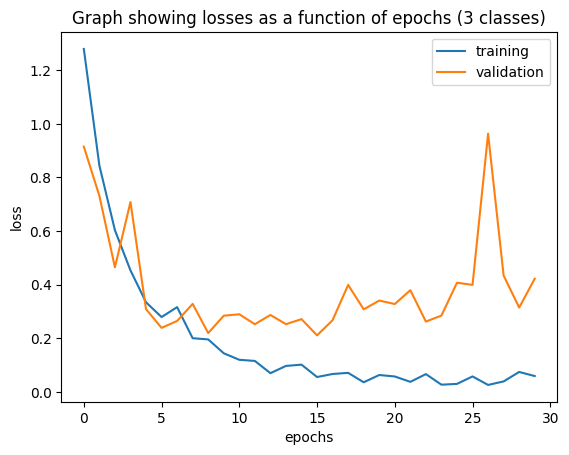

In [14]:
plt.plot(history2.history['loss'],label='training')
plt.plot(history2.history['val_loss'],label='validation')
plt.title('Graph showing losses as a function of epochs (3 classes)')
plt.xlabel('epochs'); plt.ylabel('loss'); plt.legend()

In [19]:
model2.load_weights("save_best2.h5")

We now define a function that predicts which class an image belongs to:

In [20]:
def predict3classes(path_image):
  image=mpimg.imread(path_image)
  plt.imshow(image)
  img = keras.preprocessing.image.load_img(
    path_image, target_size=image_size
  )
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)  # Create batch axis

  predictions = model2.predict(img_array)
  score = predictions[0]
  print(
    "This image is %.2f percent other, %.2f percent Peugeot and %.2f percent Renault."
    % (100 * score[0], 100 * score[1], 100 * score[2])
  )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
This image is 100.00 percent other, 0.00 percent Peugeot and 0.00 percent Renault.


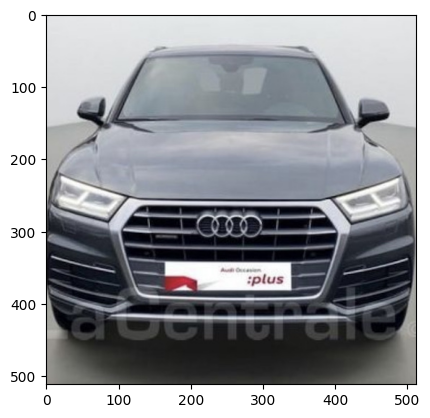

In [21]:
predict3classes("../data/tests/autres/audi.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
This image is 99.97 percent other, 0.00 percent Peugeot and 0.03 percent Renault.


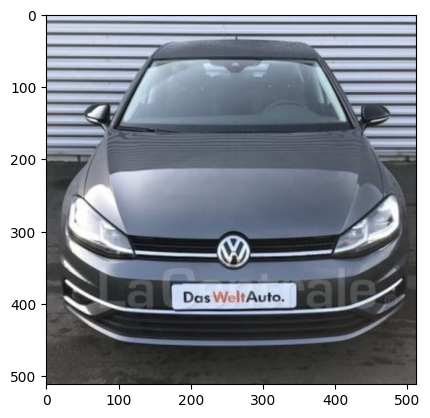

In [22]:
predict3classes("../data/tests/autres/volkswagen1.jpeg")

## Conclusion
This project allowed us to discover what machine learning really is. Before starting this course, we thought that such classification algorithms were composed of a series of “if” loops. The reality is quite different, as we saw in this project.
This course also gave us the opportunity to carry out a project that we had had in mind for a long time and that was close to our hearts, as we explained in the introduction. \\
With three-dimensional modeling of vehicles and a much larger sample, we could create a real “car Shazam” that would identify the make and model of a car from a simple photo.